# All Ireland M.bovis strain diversity and clade identification

In [1]:
import sys,os,io,shutil,subprocess
import glob
from importlib import reload
import numpy as np
import pandas as pd
pd.set_option('display.width', 200)
import pylab as plt
import matplotlib as mpl
from Bio import SeqIO
import seaborn as sns
sys.path.append('pathogenie')
from snipgenie import tools, aligners, app, trees, plotting
import toytree, toyplot
path = '/storage/btbgenie/all_ireland_results'

## run NI

In [ ]:
reload(app)
args = {'threads':20, 'outdir': '/storage/btbgenie/NI_results', 'labelsep':'_',
        'input':['/storage/btbgenie/mbovis_ireland/NI'],
         'species': 'Mbovis-AF212297',
         'overwrite':False,
         'custom_filters': True,       
         'buildtree':True}
W = app.WorkFlow(**args)
st = W.setup()
W.run()

## run CVRL samples

In [ ]:
args = {'threads':20, 'outdir': '/storage/btbgenie/cvrl_results', 'labelsep':'_',
        'input':['/storage/btbgenie/mbovis_ireland/CVRL'],
         'species': 'Mbovis-AF212297',
         'overwrite':False,
         'custom_filters': True,
         'buildtree':True}
W = app.WorkFlow(**args)
st = W.setup()
W.run()

In [63]:
reload(trees)
spo=pd.read_csv('/storage/btbgenie/all_ireland_results/cvrl_spoligotypes.csv')
treefile = '/storage/btbgenie/cvrl_results/tree.newick'
tre = toytree.tree(treefile)
tipnames = tre.get_tip_labels()
mapping = dict(zip(spo['sample'],spo.SB))
colormap = trees.colors_from_labels(spo,'name','SB')
tip_colors = [colormap[mapping[i]] if i in mapping else 'Black' for i in tipnames]

canvas,t,r=tre.draw(layout='r',width=1000,height=1300,tip_labels_colors=tip_colors,
                    scalebar=True,);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="1000.0px" height="1300.0px" viewBox="0 0 1000.0 1300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t08750c9a85a843ba8c916db28d35102b"> TB20-002906 TB20-001933 TB20-004626 TB20-002808 TB20-002892 TB20-001910 TB20-001857 TB20-005178 TB20-001937 TB20-001809 TB19-008982 TB20-001915 TB20-010767 TB20-001934 TB20-004440 TB20-001642 TB20-005185 TB20-005176 TB20-001911 TB20-001126 TB20-001128 TB20-002813 TB20-007915 TB20-001643 TB20-002778 TB19-008994 TB20-001899 TB20-001905 TB20-001936 TB20-001909 TB20-001916 TB20-001810 TB20-002896 TB20-001901 TB20-000241 TB20-002817 TB20-002811 TB19-008912 TB20-001173 TB20-011641 TB20-008537 TB19-006577 TB21-000176 TB19-009574 TB20-009876 TB21-000285 TB20-001461 TB19-002752 TB19-008463 TB19-005744 TB19-006652 TB19-011491 TB21-000023 TB20-013244 TB19-006800 TB19-008997 TB19-001398 TB20-009240 TB20-013235 TB20-013147 TB19-002048 TB19-002065 TB19-002829 TB20-003768 TB20-009871 TB20-010271 TB19-009596 TB20-011764 TB20-007302 TB19-008545 TB19-003429 TB19-002830 TB19-006612 TB19-003340 TB19-009667 TB20-009217 TB20-009514 TB20-003005 TB20-007303 TB20-007262 TB20-009561 TB20-004667 TB19-008474 TB20-013240 TB20-000958 TB19-008275 TB19-003049 TB19-004853 TB19-003588 TB20-007360 TB20-007425 TB20-003043 TB19-008383 TB19-011105 TB19-007893 TB20-007117 TB20-013234 TB20-011673 TB19-000499 TB19-001116 TB20-012859 TB19-011618 TB20-002987 TB19-000708 TB19-005144 TB20-007935 TB20-001041 TB19-006247 TB19-006257 TB20-005008 TB19-008959 TB19-011395 TB20-011697 TB19-011445 TB19-000031 TB19-003858 TB20-001637 TB20-007429 TB19-004622 TB20-001761 TB19-005229 TB20-003818 TB19-008302 TB19-001492 TB19-005970 TB19-006006 TB19-006007 TB19-008952 TB19-008949 TB19-008951 TB20-009522 TB19-005570 TB19-007739 TB21-000221 TB19-009902 TB21-000123 TB19-011184 TB20-013242 TB21-000449 TB19-011599 TB20-005071 TB20-010543 TB20-007868 TB19-005831 TB19-002781 TB19-010863 TB19-005737 TB19-005738 TB19-010840 TB19-008662 TB19-008458 TB19-006428 TB20-002752 TB19-009558 TB19-009477 TB19-007751 TB19-007770 TB20-004724 TB19-007328 TB19-010920 TB19-006784 TB19-006246 TB19-009603 TB20-002810 TB19-003261 TB19-003263 TB19-003260 TB19-006555 TB19-011417 TB19-009513 TB19-009600 ref TB19-007878 TB20-001845 TB19-009457 TB20-004414 TB19-007948 TB19-011162 TB20-001436 TB19-011141 TB19-009547 TB20-002585 TB19-010688 TB19-006435 TB19-006791 TB19-005728 TB19-011233 TB19-011235 TB19-011426 TB19-006656 TB19-008697 TB19-008320 TB19-007950 TB19-009901 TB20-004313 TB20-005617 TB20-004244 TB19-006259 TB20-012011 TB20-007229 TB19-007279 TB19-009474 TB19-010956 TB20-003627 TB20-002800 TB19-006822 TB19-008616 TB19-008539 TB19-009502 TB19-009551 TB19-009497 TB19-007867 TB19-009525 TB19-008732 TB20-003799 0 47 94 140 187 234 281 327 374 421

## custom code to integrate previously aligned bam files together and call variants

This allows us to join previously mapped results together in one call without re-aligning

In [64]:
#read in bam files
mapped = {'wicklow':'/storage/btbgenie/wicklow_results/mapped/','cvrl':'/storage/btbgenie/cvrl_results/mapped/',
                'monaghan':'/storage/btbgenie/monaghan/monaghan_results/mapped/',
                'NI':'/storage/btbgenie/NI_results/','UK':'/storage/btbgenie/UK_results/mapped'}
reload(app)
bam_files=[]
for m in mapped:
    f=app.get_files_from_paths(mapped[m], '*.bam')
    bam_files.extend(f)
print (len(bam_files))

outdir='/storage/btbgenie/all_ireland_results'
df = app.get_samples(bam_files,sep='_')
app.write_samples(df, outdir)

467


'/storage/btbgenie/all_ireland_results/samples.txt'

In [ ]:
#df.to_csv('/storage/btbgenie/mbovis_ireland/temp.csv',index=False)

## run previously aligned files

In [ ]:
gff_file=os.path.join(outdir,'mbovis.gff')
tools.gff_bcftools_format(app.mbovis_gb, gff_file)
app.run_bamfiles(bam_files, app.mbovis_genome, outdir='/storage/btbgenie/all_ireland_results', threads=20,
                 mask=app.mbovis_mask, gff_file=gff_file,
                 custom_filters=True, overwrite=False)

[      1  217496  434991  652486  869981 1087476 1304971 1522467 1739962
 1957457 2174952 2392447 2609942 2827437 3044933 3262428 3479923 3697418
 3914913 4132408 4349904]
parallel bcftools mpileup -r {1} -a "AD,ADF,ADR,DP,SP,INFO/AD,INFO/ADF,INFO/ADR" -O b --min-MQ 10 -o {2} -f /home/farrell/.config/snipgenie/genome/Mbovis_AF212297.fa /storage/btbgenie/wicklow_results/mapped/31-12952.bam /storage/btbgenie/wicklow_results/mapped/48-MBovis.bam /storage/btbgenie/wicklow_results/mapped/49-MBovis.bam /storage/btbgenie/wicklow_results/mapped/28-12935.bam /storage/btbgenie/wicklow_results/mapped/27-MBovis.bam /storage/btbgenie/wicklow_results/mapped/15-11643.bam /storage/btbgenie/wicklow_results/mapped/59-MBovis.bam /storage/btbgenie/wicklow_results/mapped/182-MBovis.bam /storage/btbgenie/wicklow_results/mapped/59-6110.bam /storage/btbgenie/wicklow_results/mapped/41-2165.bam /storage/btbgenie/wicklow_results/mapped/37-MBovis.bam /storage/btbgenie/wicklow_results/mapped/5-10284.bam /storage/b

In [ ]:
treefile = trees.run_RAXML(outfasta, bootstraps=100, outpath=outdir, threads=12)

## spoligotypes of all samples

In [47]:
paths = {'Wicklow':'/storage/btbgenie/mbovis_ireland/Wicklow','Monaghan':'/storage/btbgenie/mbovis_ireland/Monaghan/',
         'cvrl':'/storage/btbgenie/mbovis_ireland/CVRL',
         'NI':'/storage/btbgenie/mbovis_ireland/NI/'}
samples = []
#paths = {'cvrl':'/storage/btbgenie/mbovis_ireland/CVRL'}
for p in paths:
    f = app.get_files_from_paths(paths[p])   
    df = app.get_samples(f,sep='_')
    print (len(df['sample'].unique()))
    df=df.drop_duplicates('sample')   
    df['county'] = p   
    samples.append(df)

samples = pd.concat(samples)

214


In [ ]:
reload(tools)
res=[]
for i,r in samples.iterrows():
    f=r.filename
    samp=r['sample']
    b = tools.get_spoligotype(f,1e6)
    sb = tools.get_sb_number(b)
    print (f,samp,sb, b)
    res.append([f,samp,sb,b])
    
res = pd.DataFrame(res,columns=['filename','sample','SB','code'])
res.code.astype(object)
res.to_csv('/storage/btbgenie/all_ireland_results/spoligotypes.csv',index=False)

## get meta data

In [17]:
meta = pd.read_csv('/storage/btbgenie/mbovis_ireland/all_ireland_samples.csv')
print (len(meta))

249


## clusters

In [360]:
def run_tree_cluster(f,dist):
    
    cmd = 'TreeCluster.py  -i {f} -t {d}'.format(f=f,d=dist)
    cl=subprocess.check_output(cmd, shell=True)
    cl=pd.read_csv(io.BytesIO(cl),sep='\t')
    return cl

res=pd.DataFrame()
for d in [0.045,0.02,0.01]:    
    cl = tree_clusts('%s/RAxML_bipartitions.variants' %path, d)
    res['name']=cl.SequenceName
    res[d] = cl.ClusterNumber

In [4]:
spo = pd.read_csv('/storage/btbgenie/all_ireland_results/spoligotypes.csv')
clust = pd.read_csv('/storage/btbgenie/all_ireland_results/clusters.txt',sep='\t')

In [5]:
meta = meta.merge(spo,on='sample')
meta = meta.drop('code',1)
meta = meta.merge(clust,left_on='sample',right_on='SequenceName')

## assign clade names?

In [6]:
clmap = {7:'NI-1',5:'Wicklow-1',4:'Monaghan-1',3:'Monaghan-2',6:'Monaghan-3',-1:'Unknown'}
meta['clade'] = meta.ClusterNumber.map(clmap)

In [7]:
meta
meta.to_csv('ireland_metadata.csv')

## draw trees

In [ ]:
reload(trees)
from ete3 import CircleFace, TreeStyle, NodeStyle, RectFace, TextFace
treefile = '/storage/btbgenie/all_ireland_results/RAxML_bipartitions.variants'

def make_tree():
    
    labelmap = dict(zip(meta['name'],meta.species))
    colormap = trees.colors_from_labels(meta,'name','county')
    t,ts = trees.create_tree(treefile, 'ref', colormap=colormap)  #labelmap=labelmap
    colors = {'wicklow': 'blue', 'monaghan': 'green','NI':'crimson'}
    for i in colors:
        f=ts.legend.add_face(
                TextFace(text=i,fgcolor=colors[i],fsize=28),            
                column=0)
    return t

t = make_tree()
ts=TreeStyle()
ts.scale=8000
t.render("%%inline",tree_style=ts,w=1000)

In [ ]:
t = make_tree()
#out = t.get_common_ancestor("19-4281", "19-2438", "461")
#out.delete()

In [ ]:
def color_clades(t):
    wick = t.get_common_ancestor("19-11957", "43-MBovis")
    mon = t.get_common_ancestor("19-7433", "19-6796")
    mon2 = t.get_common_ancestor("548", "2703")
    ni = t.get_common_ancestor("ERR125607","ERR125601")

    colors=['LightSteelBlue','lightgreen','lightgreen','salmon']
    for common,clr in zip([wick,mon,mon2,ni],colors):
        nodesinbranch = [node for node in common.traverse()]
        nstyle1=NodeStyle()
        nstyle1['bgcolor']=clr
        common.set_style(nstyle1)
        
color_clades(t)

In [ ]:
reload(trees)
ts=TreeStyle()
ts.scale=9000
ts.show_leaf_name = False
trees.set_nodesize(t, 40)
ts.mode = 'c'
t.render("%%inline",tree_style=ts,w=800)
#t.render("/storage/btbgenie/all_ireland.png",tree_style=ts,w=2000)

In [ ]:
samples.county.value_counts()
print (samples)

In [ ]:
colormap = trees.colors_from_labels(spo,'sample','SB')
labelmap = dict(zip(spo['sample'],spo.SB))
t,ts = trees.create_tree(treefile, 'ref')#, colormap=colormap, labelmap=labelmap)
color_clades(t)
trees.color_leaves(t, colormap)
trees.set_tiplabels(t,labelmap)
colors = {'wicklow': 'blue', 'monaghan': 'green','NI':'crimson'}
for i in colors:
       f=ts.legend.add_face(
             TextFace(text=i,fgcolor=colors[i],fsize=28),            
              column=0)

In [ ]:
ts.mode = 'c'
trees.set_nodesize(t, 10)
ts.scale=2000
t.render("%%inline",tree_style=ts,w=800)
#t.render("/storage/btbgenie/sb_tree.png",tree_style=ts,w=2000)

## toytree

In [ ]:
treefile = '/storage/btbgenie/all_ireland_results/RAxML_bipartitions.variants'
tre = toytree.tree(treefile)
tre = tre.root('ref')
tipnames = tre.get_tip_labels()
mapping = dict(zip(meta['sample'],meta.clade))
mapping['ref'] = 'AF2122/97'
tiplabels = [mapping[i] for i in tipnames]

mapping = dict(zip(meta['sample'],meta.ClusterNumber))
colormap = trees.colors_from_labels(meta,'name','ClusterNumber')
tip_colors = [colormap[mapping[i]] if i in mapping else 'Black' for i in tipnames]
tip_labels_style={      
        "font-size": "6px",
        "-toyplot-anchor-shift": "13px",
    }
node_sizes=[0 if i else 8 for i in tre.get_node_values(None, 1, 0)]
node_colors = [colormap[mapping[n]] if n in mapping else 'black' for n in tre.get_node_values('name', True, True)]

canvas,t,r=tre.draw(layout='r',width=1200,height=1100,node_markers="o",node_hover=True, node_sizes=node_sizes,
                    tip_labels=tiplabels,tip_labels_style=tip_labels_style,node_colors=node_colors,
                    tip_labels_colors=tip_colors,scalebar=True,);
#import toyplot.png
#toyplot.pdf.render(canvas,'/storage/btbgenie/all_ireland_results/ireland_tree.pdf')

## SNP analysis

* snps unique to each clade/county
* protein groups containing common snps

In [330]:
csq = app.read_csq_file('/storage/btbgenie/all_ireland_results/csq.tsv')
snp_mat = app.get_aa_snp_matrix(csq)
#csq_ind = app.read_csq_file('/storage/btbgenie/all_ireland_results/csq_indels.tsv')
#ind_mat = app.get_aa_snp_matrix(csq_ind)

In [331]:
mat = snp_mat
#labelmap = dict(zip(meta['name'],meta.county))
#mat = mat.rename(columns=labelmap)
#freqs = mat.sum(1)/len(mat.columns)
#freqs =freqs.rename('freq') 
#freqs.sort_values()
#freqs.hist(bins=20)

In [332]:
#mat.index = mat.index.get_level_values(1)+'_'+mat.index.get_level_values(2)
stat = mat.sum(1).reset_index()
#stat.gene.value_counts()[:30]

In [333]:
cols=['name','county','SB','ClusterNumber','clade']
C=mat.T

C=C.merge(meta[cols],left_index=True,right_on='name').set_index(cols).T
#print (C)
C=C[C.sum(1)>3].T
C.iloc[:4,:2]
C.to_csv('csq_snps_ireland.csv')

/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (3 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [334]:
counties = list(C.index.get_level_values(1))
sb = list(C.index.get_level_values(2))
clust = C.index.get_level_values(3)
clades = C.index.get_level_values(4)

In [ ]:
colormap1 = dict(zip(clades.unique(), trees.qcolors))
colormap1 = {'Wicklow-1': 'green', 'Monaghan-3': 'red', np.nan: 'gray', 
             'Monaghan-1': 'brown', 'Monaghan-2': 'burlywood', 'Unknown': 'lightblue', 'NI-1': 'blue'}
colors1 = [colormap1[i] if i in colormap1 else 'Black' for i in clades]
#make legend
import matplotlib.patches as mpatches
pts=[]
for c in colormap1:
    pts.append(mpatches.Patch(color=colormap1[c],label=c))
g=sns.clustermap(C,xticklabels=False,yticklabels=False,figsize=(17,12),cmap='gray_r',cbar_pos=None,row_colors=colors1)
g.fig.legend(handles=pts,bbox_to_anchor=(1.05, 1), )
g.savefig('/storage/btbgenie/all_ireland_results/snp_clusters.jpg')

## PCA

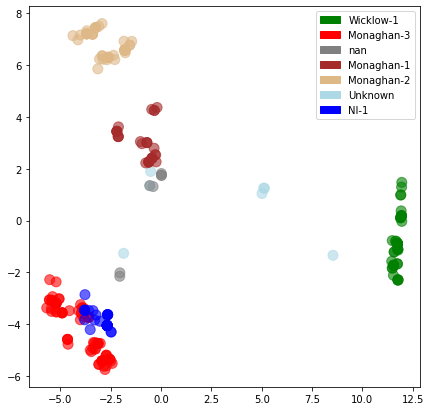

In [345]:
import sklearn
from sklearn import decomposition
from sklearn import manifold

pca = decomposition.PCA(n_components=3)
mds = manifold.MDS(n_components=3)
pos = mds.fit(C).embedding_
X = pca.fit_transform(pos)
#X = pca.transform(C)
df=pd.DataFrame(X)
df['sb']=sb
df.to_csv('/storage/btbgenie/all_ireland_results/pca_snp.csv')

fig,ax = plt.subplots(figsize=(7, 7))
sc=ax.scatter(X[:, 0], X[:, 1], c=colors1, s=100, alpha=.6)    
ax.legend(handles=pts,loc='best')
fig.savefig('/storage/btbgenie/all_ireland_results/pca_snp_clusters.jpg',dpi=150)